In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge , RidgeCV , Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
hsd = fetch_california_housing()

In [4]:
hsd_df = pd.DataFrame(hsd.data,columns=hsd.feature_names)
hsd_df['Price'] = hsd.target
hsd_df = hsd_df.sample(frac = 0.2 , random_state = 200)
hsd_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
20523,3.9000,22.0,5.707838,1.023753,1088.0,2.584323,38.51,-121.55,1.469
17655,4.7069,26.0,5.135693,0.952802,1007.0,2.970501,37.25,-121.89,2.348
11334,6.6355,19.0,7.210909,1.029091,1098.0,3.992727,33.75,-117.95,2.761
636,3.3431,10.0,4.595876,1.239175,877.0,1.808247,37.72,-122.16,1.375
14954,4.3750,25.0,6.566667,1.050794,1905.0,3.023810,32.75,-116.98,2.140


<Axes: >

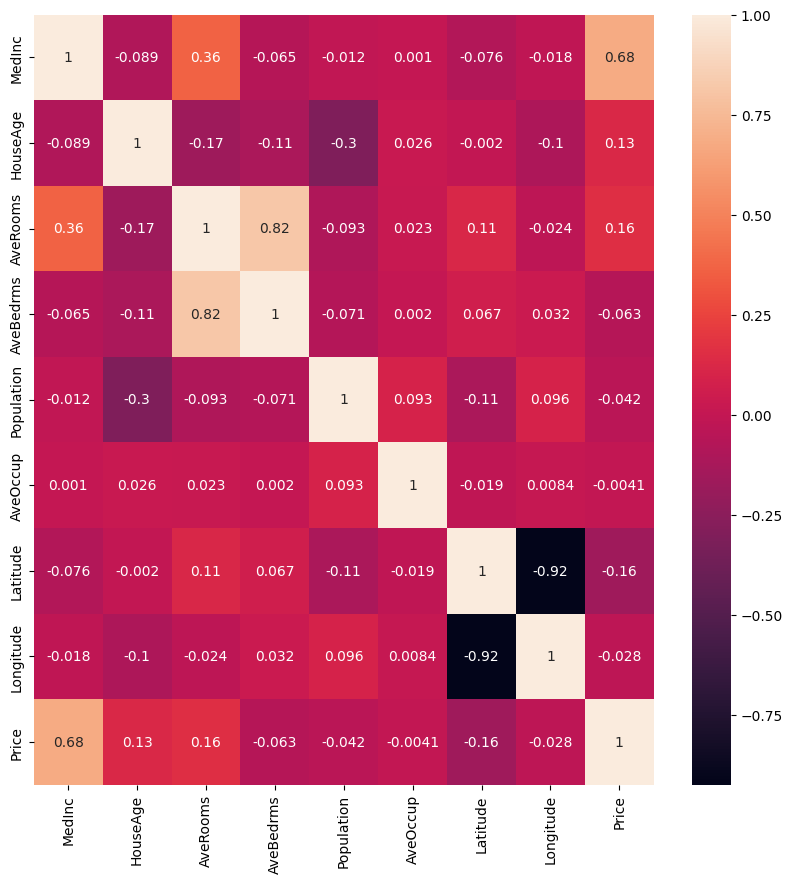

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(hsd_df.corr(),annot=True)

In [6]:
features = hsd_df.columns[0:9]
target = hsd_df.columns[-1]
X = hsd_df[features].values
y = hsd_df[target].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("The Dimension of X_train is {}".format(X_train.shape))

The Dimension of X_train is (2889, 9)


In [7]:
lr=LinearRegression()

In [18]:
lr.fit(X_train,y_train)

tsr=lr.score(X_train,y_train)
tsr2=lr.score(X_test,y_test)

lr.fit(X_train,y_train)


print(tsr)
print(tsr2)

ridgeReg= Ridge(alpha=10)

lassoreg = Lasso(alpha=10)

ridgeReg.fit(X_train,y_train)

1.0
1.0


Ridge(alpha=10)

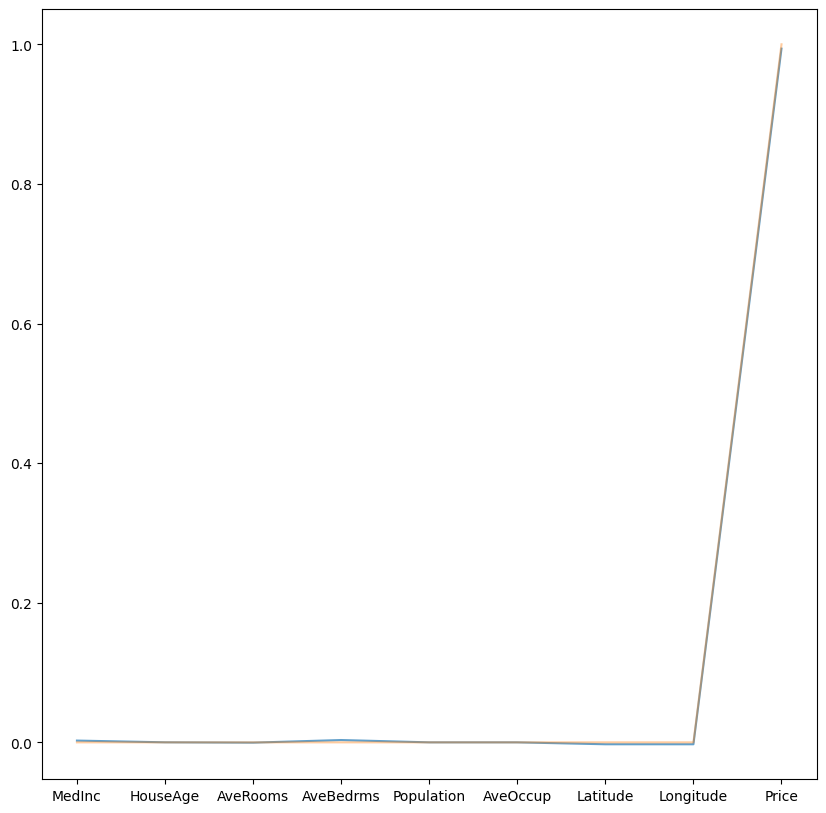

In [19]:
plt.figure(figsize=(10,10))
plt.plot(features,ridgeReg.coef_,alpha=.7,label=r'Ridge')
plt.plot(features,lr.coef_,alpha=.4)
